In [1]:
import lvmnebular
import numpy as np

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_5e-14',900)

#u.radialbin(rbinmax=240, drbin=10)

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14



In [3]:
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), loadfile=True, plot=False)
#u.fitlines(sys_vel=20, lines0= np.array([9069, 6312]), loadfile=False, plot=True)

Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '6731' '6717' '6584' '6563' '6548' '6312'
 '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729' '3726']


In [4]:
u.runpyneb(niter=2, bin=False, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:270: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:289: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:306: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:325: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:342: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:360: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:374: RuntimeWarning: Mean of empty 

In [11]:
u.linefitdict

fiber_id [1],delta_ra [1],delta_dec [1],9069_flux,9069_flux_err,9069_lambda,9069_lambda_err,9069_sigma,9069_sigma_err,7319_flux,7319_flux_err,7319_lambda,7319_lambda_err,7319_sigma,7319_sigma_err,7320_flux,7320_flux_err,7320_lambda,7320_lambda_err,7320_sigma,7320_sigma_err,7330_flux,7330_flux_err,7330_lambda,7330_lambda_err,7330_sigma,7330_sigma_err,6731_flux,6731_flux_err,6731_lambda,6731_lambda_err,6731_sigma,6731_sigma_err,6717_flux,6717_flux_err,6717_lambda,6717_lambda_err,6717_sigma,6717_sigma_err,6584_flux,6584_flux_err,6584_lambda,6584_lambda_err,6584_sigma,6584_sigma_err,6563_flux,6563_flux_err,6563_lambda,6563_lambda_err,6563_sigma,6563_sigma_err,6548_flux,6548_flux_err,6548_lambda,6548_lambda_err,6548_sigma,6548_sigma_err,6312_flux,6312_flux_err,6312_lambda,6312_lambda_err,6312_sigma,6312_sigma_err,5755_flux,5755_flux_err,5755_lambda,5755_lambda_err,5755_sigma,5755_sigma_err,5007_flux,5007_flux_err,5007_lambda,5007_lambda_err,5007_sigma,5007_sigma_err,4959_flux,4959_flux_err,4959_lambda,4959_lambda_err,4959_sigma,4959_sigma_err,4861_flux,4861_flux_err,4861_lambda,4861_lambda_err,4861_sigma,4861_sigma_err,4363_flux,4363_flux_err,4363_lambda,4363_lambda_err,4363_sigma,4363_sigma_err,4069_flux,4069_flux_err,4069_lambda,4069_lambda_err,4069_sigma,4069_sigma_err,4076_flux,4076_flux_err,4076_lambda,4076_lambda_err,4076_sigma,4076_sigma_err,3970_flux,3970_flux_err,3970_lambda,3970_lambda_err,3970_sigma,3970_sigma_err,3729_flux,3729_flux_err,3729_lambda,3729_lambda_err,3729_sigma,3729_sigma_err,3726_flux,3726_flux_err,3726_lambda,3726_lambda_err,3726_sigma,3726_sigma_err,TeO2,TeO2err,TeO3,TeO3err,TeN2,TeN2err,TeS2,TeS2err,TeS3,TeS3err,neO2,neO2err,neS2,neS2err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1.546738304939677e-27,0.0,3.633471475197336e-12,1.1930472083688043e-14,9069.840458255241,0.0023848479826190563,0.6958652491540968,0.001858750109897595,5.1581702600464995e-14,4.472867431098625e-15,7320.488271122551,0.06982739307142746,0.6896980817108694,0.07166778006689206,5.954643985288988e-14,3.288813847027e-15,7320.736029503013,0.048066735412521856,0.7561569738779756,0.04772533714653631,5.95779517634159e-14,6.428122430869843e-15,7331.317976372984,0.11568647606975614,1.010523804263328,0.1355104451317866,1.7390271329978264e-12,9.657003519200693e-15,6731.718003894228,0.0031005801240924073,0.5321321038476537,0.0024311301098628025,2.260390948847377e-12,1.0922932451378553e-14,6717.338943298809,0.0026642107707484865,0.5270149360051319,0.0020585356292221165,6.176824695138703e-12,1.8087342977170852e-14,6584.339836856631,0.0015579712865941395,0.5192846907187525,0.0011590869397678067,4.3718976916081334e-11,4.7861921076904994e-14,6563.688380730671,0.0005734048329928272,0.5188096801426213,0.00041587549365570465,2.1128903321256295e-12,1.0770661830165281e-14,6548.9306671306595,0.0027878964498091238,0.5212264995045706,0.002220559150235562,7.387076292494348e-14,3.1038460621035726e-15,6312.877833182215,0.02422

(151,)
(151, 1)
(151, 1)


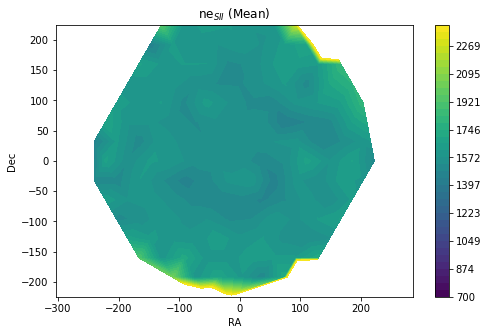

In [20]:
u.plotmap(u.linefitdict['neS2'], 700 , 2400, title=r'ne$_{SII}$ (Mean)', output='neS2')


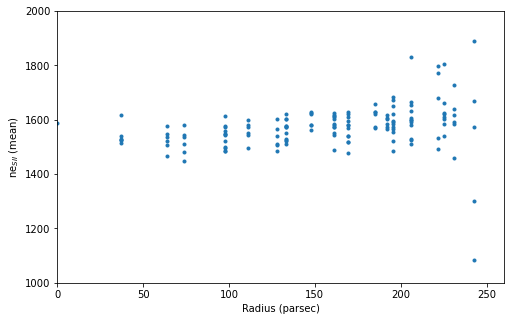

In [6]:
u.plotprofile(u.linefitdict['neS2'], 1000, 2000, title=r'ne$_{SII}$ (mean)', output='neS2')